In [26]:
import os
import random
import cv2 as cv
import numpy as np
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [35]:
for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Female Raw'):
    path_i = 'C:/Users/72684/Desktop/Reinforcement Learning/Female Raw/{}'.format(i)
    path_f = 'C:/Users/72684/Desktop/Reinforcement Learning/Female/{}'.format(i)
    cv.imwrite(path_f, cv.resize(cv.imread(path_i, cv.IMREAD_GRAYSCALE), dsize = (48, 48), interpolation = cv.INTER_AREA))

for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Male Raw'):
    path_i = 'C:/Users/72684/Desktop/Reinforcement Learning/Male Raw/{}'.format(i)
    path_f = 'C:/Users/72684/Desktop/Reinforcement Learning/Male/{}'.format(i)
    cv.imwrite(path_f, cv.resize(cv.imread(path_i, cv.IMREAD_GRAYSCALE), dsize = (48, 48), interpolation = cv.INTER_AREA))

In [27]:
np.random.seed(7)
female = []
male = []

for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Female'):
    path = 'C:/Users/72684/Desktop/Reinforcement Learning/Female/{}'.format(i)
    female.append([cv.imread(path, cv.IMREAD_COLOR) / 255, 0])

for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Male'):
    path = 'C:/Users/72684/Desktop/Reinforcement Learning/Male/{}'.format(i)
    male.append([cv.imread(path, cv.IMREAD_COLOR) / 255, 1])

female = np.array(female)
male = np.array(male)

f_trn, f_tst = train_test_split(female, test_size = 0.2)
m_trn, m_tst = train_test_split(male, test_size = 0.2)

train = []
test = []

for i in range(len(f_trn)):
    train.append(f_trn[i])
    
for i in range(len(m_trn)):
    train.append(m_trn[i])

for i in range(len(f_tst)):
    test.append(f_tst[i])

for i in range(len(m_tst)):
    test.append(m_tst[i])

random.shuffle(train)
random.shuffle(test)

train = np.array(train)
test = np.array(test)

trn_d = []
tst_d = []

trn_l = np.zeros(len(train))
tst_l = np.zeros(len(test))

for i in range(len(train)):
    trn_l[i] = train[i, 1]
    trn_d.append(train[i, 0])

for i in range(len(test)):
    tst_l[i] = test[i, 1]
    tst_d.append(test[i, 0])

trn_d = np.array(trn_d)
tst_d = np.array(tst_d)

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]
C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [6]:
tf.random.set_seed(7)

mdl = Sequential()

mdl.add(Conv2D(16, 3, activation = 'relu', input_shape = (48, 48, 3), padding = "same"))
mdl.add(MaxPooling2D(2, 2))

mdl.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
mdl.add(MaxPooling2D(2, 2))

mdl.add(Conv2D(64, 3, activation = 'relu', padding = "same"))

mdl.add(Flatten())
mdl.add(Dense(100, activation = 'relu'))
mdl.add(Dense(1, activation = 'sigmoid'))

mdl.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])
mdl.save('mdl')

INFO:tensorflow:Assets written to: mdl\assets


In [7]:
def hyp_prm_fit(epochs, btch_sz, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz])
    steps = np.array([0.6, 0.8, 1, 1.2, 1.4])
    dt_tp = np.array(['int', 'int'])
    h_p_fld = np.zeros(len(steps))
    acc = 0
    cnt = 0
    acc_hst = []
    
    mdl = keras.models.load_model('mdl')
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    print(acc)
    
    for episode in range(5):
        for i in range(len(h_p)):
            h_p_fld = np.array(list(set(np.array(h_p[i] * steps, dt_tp[i]))))
            print(h_p_fld)
            new_acc = np.zeros(len(h_p_fld))
            rsrv = h_p[i]
            print(h_p)
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = keras.models.load_model('mdl')
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.max(new_acc) > acc:
                cnt = 0
            
            else:
                cnt += 1
            
            if h_p_fld[np.argmax(new_acc)] == rsrv:
                res_acc = np.copy(new_acc)
                res_acc[np.argmax(new_acc)] = 0
                
                if np.max(res_acc) == np.max(new_acc):
                    h_p[i] = h_p_fld[np.argmax(res_acc)]
                    acc_hst.append(np.max(res_acc))
                    acc = np.max(res_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            else:
                h_p[i] = h_p_fld[np.argmax(new_acc)]
                acc_hst.append(np.max(new_acc))
                acc = np.max(new_acc)
            
            print(new_acc)
            
            if cnt > len(h_p):
                break
    
    acc_hst = np.array(acc_hst)
    print(h_p)
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()

0.675
[ 9 12 15 18 21]
[15 15]
[0.625      0.64999998 0.67500001 0.69999999 0.69999999]
[ 9 12 15 18 21]
[18 15]
[0.67500001 0.64999998 0.69999999 0.64999998 0.64999998]
[10 14 18 21 25]
[18 15]
[0.625      0.67500001 0.69999999 0.69999999 0.69999999]
[ 9 12 15 18 21]
[21 15]
[0.67500001 0.67500001 0.69999999 0.67500001 0.67500001]
[12 16 21 25 29]
[21 15]
[0.64999998 0.64999998 0.69999999 0.69999999 0.69999999]
[35 15 20 25 30]
[25 15]
[0.72500002 0.67500001 0.72500002 0.69999999 0.75      ]
[ 9 12 15 18 21]
[30 15]
[0.72500002 0.72500002 0.75       0.69999999 0.75      ]
[36 42 18 24 30]
[30 21]
[0.75       0.67500001 0.64999998 0.67500001 0.75      ]
[12 16 21 25 29]
[36 21]
[0.77499998 0.75       0.75       0.72500002 0.72500002]
[36 12]


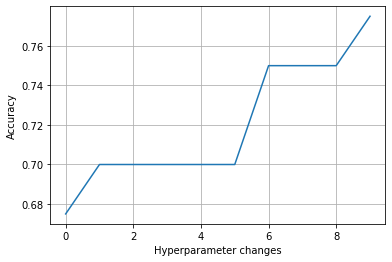

In [8]:
tf.random.set_seed(7)
hyp_prm_fit(15, 15, trn_d, trn_l, tst_d, tst_l)

0.7333333492279053
[15 15]
[0.71666666 0.73333335 0.75       0.73333333 0.75      ]
[15 15]
[0.725      0.74166667 0.73333333 0.75       0.70000001]
[15 18]
[0.70833333 0.73333333 0.73333335 0.73333333 0.73333333]
[15 18]
[0.74999998 0.65       0.74166667 0.725      0.68333336]
[15 10]
[0.74166667 0.73333333 0.75       0.725      0.75833333]
[21 10]
[0.77499998 0.75833333 0.74166665 0.73333333 0.68333334]
[21  6]
[0.73333333 0.72499998 0.775      0.75833333 0.72500002]
[21  6]
[0.71666668 0.75       0.74166665 0.75833333 0.75      ]
[21  7]
[0.73333335 0.75833333 0.73333333 0.75833333 0.75833333]
[16  7]
[0.75833333 0.74999998 0.75833333 0.75       0.725     ]
[16  4]


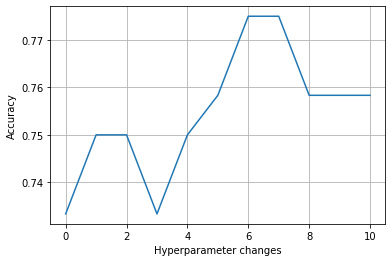

In [5]:
hyp_prm_fit(15, 15, trn_d, trn_l, tst_d, tst_l)

0.7083333333333334
[ 9 12 15 18 21]
[15 15]
[0.69166666 0.725      0.73333335 0.75       0.75833333]
[ 9 12 15 18 21]
[21 15]
[0.73333335 0.69999999 0.73333333 0.75       0.74166665]
[12 16 21 25 29]
[21 18]
[0.72500002 0.75       0.76666667 0.725      0.75      ]
[10 14 18 21 25]
[21 18]
[0.75833333 0.725      0.70000001 0.70833333 0.69166666]
[12 16 21 25 29]
[21 10]
[0.75833333 0.74166667 0.75       0.75       0.725     ]
[ 7  9 12 14 16]
[12 10]
[0.70833333 0.73333333 0.75       0.72499998 0.75      ]
[ 7  9 12 14 16]
[12 10]
[0.65       0.73333333 0.75       0.74166667 0.75833333]
[16 10]


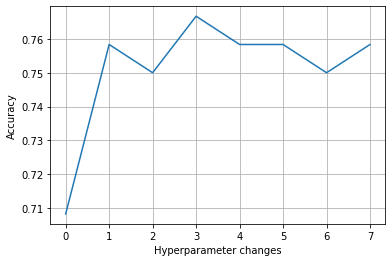

In [12]:
hyp_prm_fit(15, 15, trn_d, trn_l, tst_d, tst_l)

In [28]:
def build_model(krnl1, krnl2, krnl3, dns_lr, maps):
    tf.random.set_seed(7)
    
    mdl = Sequential()
    
    mdl.add(Conv2D(maps, krnl1, activation = 'relu', input_shape = (48, 48, 3), padding = "same"))
    mdl.add(MaxPooling2D(2, 2))
    
    mdl.add(Conv2D(2 * maps, krnl2, activation = 'relu', padding = "same"))
    mdl.add(MaxPooling2D(2, 2))
    
    mdl.add(Conv2D(4 * maps, krnl3, activation = 'relu', padding = "same"))
    
    mdl.add(Flatten())
    mdl.add(Dense(dns_lr, activation = 'relu'))
    mdl.add(Dense(1, activation = 'sigmoid'))
    
    mdl.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])
    
    return mdl

In [46]:
def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])
    steps_dscrt = np.array([3, 5, 7, 9], int)
    dt_tp = np.array(['int', 'int', 'int', 'int'])
    acc = 0
    cnt = 0
    acc_hst = []
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps)
    tf.random.set_seed(7)
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10):
        for i in range(len(h_p)):
            if i <= 3:
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else:
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.max(new_acc) > acc:
                cnt = 0
            
            else:
                cnt += 1
            
            if h_p_fld[np.argmax(new_acc)] == rsrv:
                res_acc = np.copy(new_acc)
                res_acc[np.argmax(new_acc)] = 0
                
                if np.max(res_acc) == np.max(new_acc):
                    h_p[i] = h_p_fld[np.argmax(res_acc)]
                    acc_hst.append(np.max(res_acc))
                    acc = np.max(res_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            else:
                h_p[i] = h_p_fld[np.argmax(new_acc)]
                acc_hst.append(np.max(new_acc))
                acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0:
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p):
                break
    
    acc_hst = np.array(acc_hst)
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()

0.675
[ 9 12 15 18 21]
[ 15  15 100  16   3   3   3]
[0.625      0.64999998 0.67500001 0.69999999 0.69999999]
[ 9 12 15 18 21]
[ 18  15 100  16   3   3   3]
[0.67500001 0.64999998 0.69999999 0.64999998 0.64999998]
[100 140  80 120  60]
[ 18  15 100  16   3   3   3]
[0.69999999 0.67500001 0.64999998 0.67500001 0.64999998]
[ 9 12 16 19 22]
[ 18  15 100  16   3   3   3]
[0.64999998 0.67500001 0.69999999 0.67500001 0.72500002]
[3 5 7 9]
[ 18  15 100  22   3   3   3]
[0.72500002 0.72500002 0.64999998 0.72500002]
[3 5 7 9]
[ 18  15 100  22   5   3   3]
[0.72500002 0.80000001 0.80000001 0.72500002]
[3 5 7 9]
[ 18  15 100  22   5   5   3]
[0.80000001 0.77499998 0.77499998 0.75      ]
[10 14 18 21 25]
[ 18  15 100  22   5   5   3]
[0.72500002 0.75       0.80000001 0.77499998 0.77499998]
[ 9 12 15 18 21]
[ 18  15 100  22   5   5   3]
[0.80000001 0.80000001 0.80000001 0.77499998 0.77499998]
[100 140  80 120  60]
[ 18   9 100  22   5   5   3]
[0.80000001 0.80000001 0.80000001 0.80000001 0.82499999

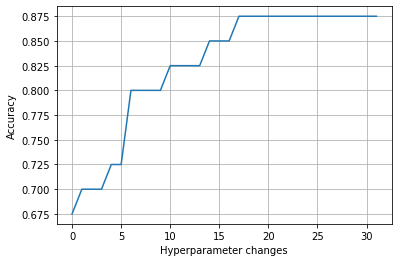

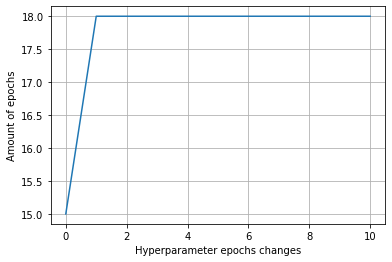

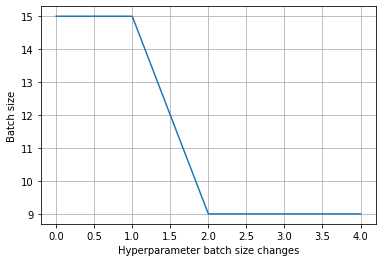

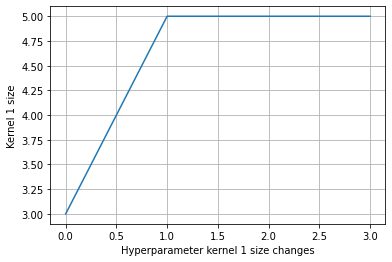

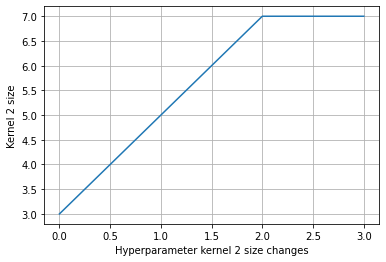

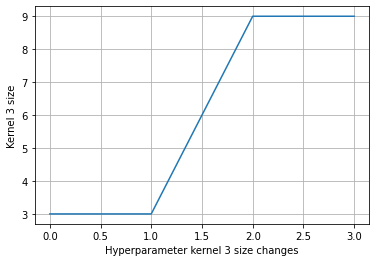

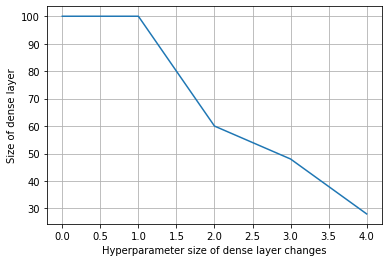

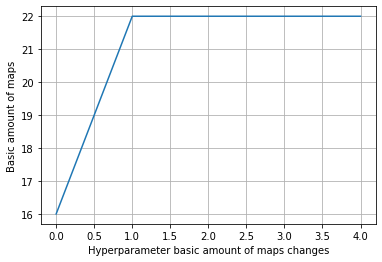

In [47]:
hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l)

In [10]:
def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])
    steps_dscrt = np.array([3, 5, 7, 9], int)
    dt_tp = np.array(['int', 'int', 'int', 'int'])
    acc = 0
    cnt = 0
    acc_hst = []
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps)
    tf.random.set_seed(7)
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10):
        for i in range(len(h_p)):
            if i <= 3:
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else:
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.random.rand() > 0.95:
                chc = np.random.choice(len(h_p_fld))
                
                if new_acc[chc] > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                h_p[i] = h_p_fld[chc]
                acc_hst.append(new_acc[chc])
                acc = new_acc[chc]
            
            else:
                if np.max(new_acc) > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                if h_p_fld[np.argmax(new_acc)] == rsrv:
                    res_acc = np.copy(new_acc)
                    res_acc[np.argmax(new_acc)] = 0
                    
                    if np.max(res_acc) == np.max(new_acc):
                        h_p[i] = h_p_fld[np.argmax(res_acc)]
                        acc_hst.append(np.max(res_acc))
                        acc = np.max(res_acc)
                    
                    else:
                        h_p[i] = h_p_fld[np.argmax(new_acc)]
                        acc_hst.append(np.max(new_acc))
                        acc = np.max(new_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0:
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p):
                break
    
    acc_hst = np.array(acc_hst)
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()

0.625
[ 15  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.64999998 0.625      0.64999998 0.69999999]
[ 21  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.67500001 0.69999999 0.69999999 0.67500001]
[ 21  18 100  16   3   3   3]
[100 140  80 120  60]
[0.69999999 0.69999999 0.67500001 0.67500001 0.67500001]
[ 21  18 140  16   3   3   3]
[ 9 12 16 19 22]
[0.67500001 0.67500001 0.69999999 0.67500001 0.67500001]
[ 21  18 140  16   3   3   3]
[3 5 7 9]
[0.69999999 0.69999999 0.67500001 0.67500001]
[ 21  18 140  16   5   3   3]
[3 5 7 9]
[0.69999999 0.67500001 0.69999999 0.72500002]
[ 21  18 140  16   5   9   3]
[3 5 7 9]
[0.72500002 0.69999999 0.69999999 0.72500002]
[ 21  18 140  16   5   9   9]
[12 16 21 25 29]
[0.67500001 0.69999999 0.72500002 0.69999999 0.72500002]
[ 29  18 140  16   5   9   9]
[10 14 18 21 25]
[0.75       0.75       0.72500002 0.80000001 0.77499998]
[ 29  21 140  16   5   9   9]
[196 168 140 112  84]
[0.80000001 0.77499998 0.80000001 0.80000001 0.75      

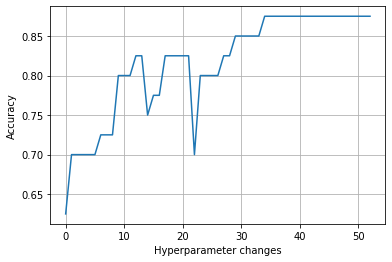

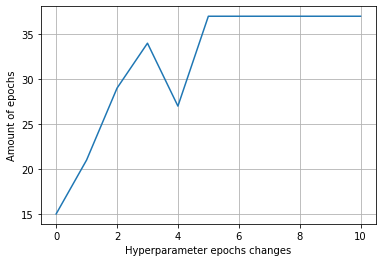

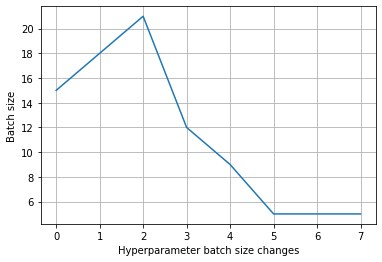

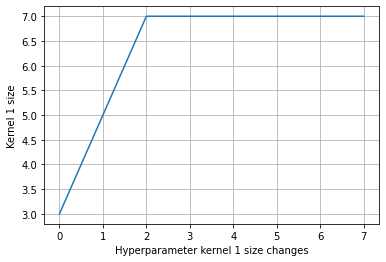

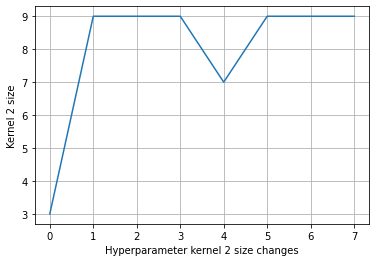

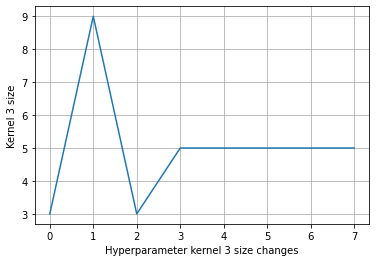

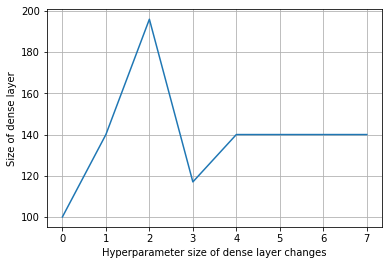

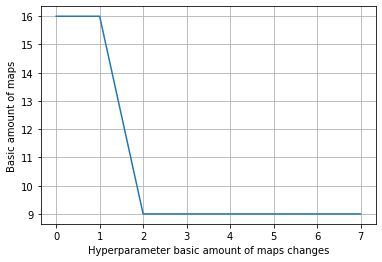

In [11]:
hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l)

In [12]:
def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])
    steps_dscrt = np.array([3, 5, 7, 9], int)
    dt_tp = np.array(['int', 'int', 'int', 'int'])
    acc = 0
    cnt = 0
    acc_hst = []
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps)
    tf.random.set_seed(7)
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10):
        for i in range(len(h_p)):
            if i <= 3:
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else:
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.random.rand() > (1 - 0.2 / (episode + 1)):
                chc = np.random.choice(len(h_p_fld))
                
                if new_acc[chc] > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                h_p[i] = h_p_fld[chc]
                acc_hst.append(new_acc[chc])
                acc = new_acc[chc]
            
            else:
                if np.max(new_acc) > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                if h_p_fld[np.argmax(new_acc)] == rsrv:
                    res_acc = np.copy(new_acc)
                    res_acc[np.argmax(new_acc)] = 0
                    
                    if np.max(res_acc) == np.max(new_acc):
                        h_p[i] = h_p_fld[np.argmax(res_acc)]
                        acc_hst.append(np.max(res_acc))
                        acc = np.max(res_acc)
                    
                    else:
                        h_p[i] = h_p_fld[np.argmax(new_acc)]
                        acc_hst.append(np.max(new_acc))
                        acc = np.max(new_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0:
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p):
                break
    
    acc_hst = np.array(acc_hst)
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()

0.625
[ 15  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.64999998 0.625      0.64999998 0.69999999]
[ 21  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.67500001 0.69999999 0.69999999 0.67500001]
[ 21  18 100  16   3   3   3]
[100 140  80 120  60]
[0.69999999 0.69999999 0.67500001 0.67500001 0.67500001]
[ 21  18 140  16   3   3   3]
[ 9 12 16 19 22]
[0.67500001 0.67500001 0.69999999 0.67500001 0.67500001]
[ 21  18 140  16   3   3   3]
[3 5 7 9]
[0.69999999 0.69999999 0.67500001 0.67500001]
[ 21  18 140  16   5   3   3]
[3 5 7 9]
[0.69999999 0.67500001 0.69999999 0.72500002]
[ 21  18 140  16   5   9   3]
[3 5 7 9]
[0.72500002 0.69999999 0.69999999 0.72500002]
[ 21  18 140  16   5   9   7]
[12 16 21 25 29]
[0.64999998 0.67500001 0.69999999 0.69999999 0.72500002]
[ 29  18 140  16   5   9   7]
[10 14 18 21 25]
[0.77499998 0.75       0.72500002 0.80000001 0.75      ]
[ 29  21 140  16   5   9   7]
[196 168 140 112  84]
[0.80000001 0.77499998 0.80000001 0.80000001 0.77499998

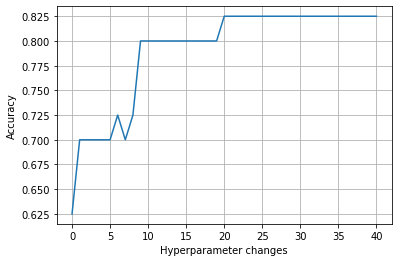

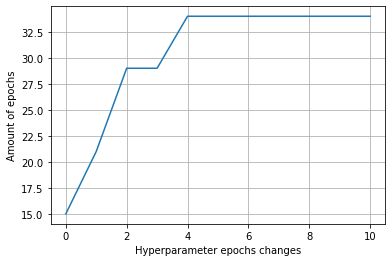

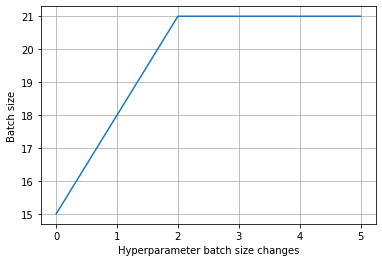

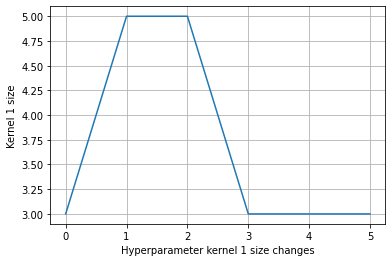

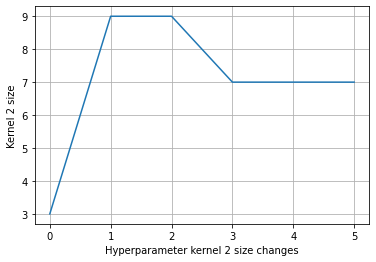

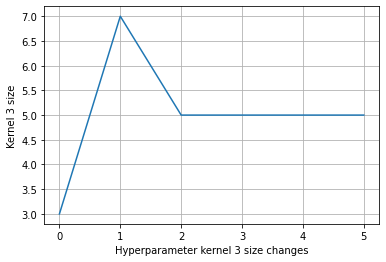

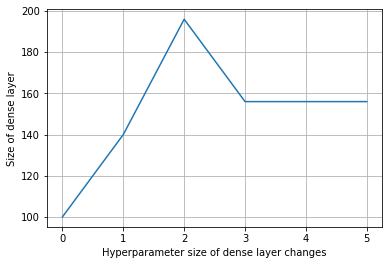

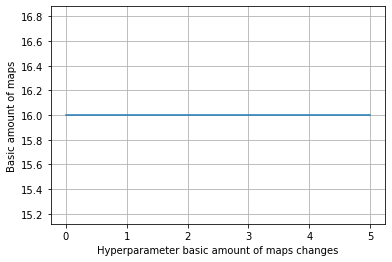

In [13]:
hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l)

In [87]:
mdl.save('mdl')
mdl_rsrv = keras.models.load_model('mdl')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mdl\assets


In [26]:
mdl.fit(trn_d, trn_l, epochs = 20, batch_size = 20, validation_data = (tst_d, tst_l))

Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 2s 11ms/sample - loss: 0.6955 - accuracy: 0.4938 - val_loss: 0.6872 - val_accuracy: 0.5250
Epoch 2/20
160/160 [==============================] - 0s 2ms/sample - loss: 0.6866 - accuracy: 0.5188 - val_loss: 0.6868 - val_accuracy: 0.5250
Epoch 3/20
160/160 [==============================] - 0s 2ms/sample - loss: 0.6575 - accuracy: 0.6562 - val_loss: 0.6702 - val_accuracy: 0.6000
Epoch 4/20
160/160 [==============================] - 0s 2ms/sample - loss: 0.6411 - accuracy: 0.6875 - val_loss: 0.6589 - val_accuracy: 0.5750
Epoch 5/20
160/160 [==============================] - 0s 2ms/sample - loss: 0.6355 - accuracy: 0.6313 - val_loss: 0.6587 - val_accuracy: 0.5500
Epoch 6/20
160/160 [==============================] - 0s 2ms/sample - loss: 0.6058 - accuracy: 0.6750 - val_loss: 0.6445 - val_accuracy: 0.5750
Epoch 7/20
160/160 [==============================] - 0s 3ms/sample - loss: 0.5868 - accur

In [35]:
mdl.evaluate(tst_d, tst_l)

40/40 [==============================] - 0s 9ms/sample - loss: 0.6908 - accuracy: 0.5000


[0.6908074378967285, 0.5]

In [ ]:
Поочерёдная проверка каждого гиперпараметра с разными величиной и направлением возможного шага

Проверка набора гиперпараметров проводится через усреднение результатов пяти обученных нейросетей

Используется общая исходная нейросеть, которая хранится в отдельной резервной переменной

Суть алгоритма относительно концепции RL заключается в выборе значения параметра, которое соответствует наибольшей точности
Таким образом награда - прирост к точности системы

Работа системы напоминает greedy алгоритм
Его можно попробовать свести к e-greedy

In [111]:
a = np.array([[2, 1, 4, 2], [1, 2, 4]])
a[0] = np.array(list(set(a[0])))
a[0]

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([1, 2, 4])

In [138]:
h_p = np.array([0.5, 10])
steps = np.array([0.7, 0.9, 1, 1.1, 1.3])
tp = np.array(['float', 'int'])
h_p_fld = np.zeros((len(h_p), len(steps)))

for i in range(len(h_p)):
            h_p_fld[i] = np.array(h_p[i] * steps, tp[i])

h_p_fld

array([[ 0.35,  0.45,  0.5 ,  0.55,  0.65],
       [ 7.  ,  9.  , 10.  , 11.  , 13.  ]])

In [132]:
h_p = np.array([0.5, 10])
tp = np.array(['int', 'str'])
a = eval(tp[0] + '(' + str(h_p) + ')')
a

SyntaxError: invalid syntax (<string>, line 1)

In [31]:
def lol():
    for i in range(7):
        print(np.random.rand(2, 3))

In [32]:
np.random.seed(7)
lol()

[[0.07630829 0.77991879 0.43840923]
 [0.72346518 0.97798951 0.53849587]]
[[0.50112046 0.07205113 0.26843898]
 [0.4998825  0.67923    0.80373904]]
[[0.38094113 0.06593635 0.2881456 ]
 [0.90959353 0.21338535 0.45212396]]
[[0.93120602 0.02489923 0.60054892]
 [0.9501295  0.23030288 0.54848992]]
[[0.90912837 0.13316945 0.52341258]
 [0.75040986 0.66901324 0.46775286]]
[[0.20484909 0.49076589 0.37238469]
 [0.47740115 0.36589039 0.83791799]]
[[0.76864751 0.31399468 0.57262533]
 [0.27604905 0.45284293 0.35297837]]


# Start

In [6]:
import os
import random
import cv2 as cv
import numpy as np
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
# Upload train/test data

np.random.seed(7)
female = []
male = []

for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Female'):
    path = 'C:/Users/72684/Desktop/Reinforcement Learning/Female/{}'.format(i)
    female.append([cv.imread(path, cv.IMREAD_COLOR) / 255, 0])

for i in os.listdir('C:/Users/72684/Desktop/Reinforcement Learning/Male'):
    path = 'C:/Users/72684/Desktop/Reinforcement Learning/Male/{}'.format(i)
    male.append([cv.imread(path, cv.IMREAD_COLOR) / 255, 1])

female = np.array(female)
male = np.array(male)

np.random.seed(7)
f_trn, f_tst = train_test_split(female, test_size = 0.2)
np.random.seed(7)
m_trn, m_tst = train_test_split(male, test_size = 0.2)

train = []
test = []

for i in range(len(f_trn)):
    train.append(f_trn[i])
    
for i in range(len(m_trn)):
    train.append(m_trn[i])

for i in range(len(f_tst)):
    test.append(f_tst[i])

for i in range(len(m_tst)):
    test.append(m_tst[i])

random.seed(7)
random.shuffle(train)
random.seed(7)
random.shuffle(test)

train = np.array(train)
test = np.array(test)

trn_d = []
tst_d = []

trn_l = np.zeros(len(train))
tst_l = np.zeros(len(test))

for i in range(len(train)):
    trn_l[i] = train[i, 1]
    trn_d.append(train[i, 0])

for i in range(len(test)):
    tst_l[i] = test[i, 1]
    tst_d.append(test[i, 0])

trn_d = np.array(trn_d)
tst_d = np.array(tst_d)

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [8]:
# Define your model and its structural hyperparameters there

def build_model(krnl1, krnl2, krnl3, dns_lr, maps):
    tf.random.set_seed(7)
    
    mdl = Sequential()
    
    mdl.add(Conv2D(maps, krnl1, activation = 'relu', input_shape = (48, 48, 3), padding = "same"))
    mdl.add(MaxPooling2D(2, 2))
    
    mdl.add(Conv2D(2 * maps, krnl2, activation = 'relu', padding = "same"))
    mdl.add(MaxPooling2D(2, 2))
    
    mdl.add(Conv2D(4 * maps, krnl3, activation = 'relu', padding = "same"))
    
    mdl.add(Flatten())
    mdl.add(Dense(dns_lr, activation = 'relu'))
    mdl.add(Dense(1, activation = 'sigmoid'))
    
    mdl.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])
    
    return mdl

In [9]:
# Hyperparameters search algorithm

def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l): # Define your system's
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])                         # hyperparameters including
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])                                              # train hyperparameters
    steps_dscrt = np.array([3, 5, 7, 9], int) # steps_cntns steps for continuous values (not limited with some set of values)
    dt_tp = np.array(['int', 'int', 'int', 'int']) # steps_dscrt for discrete values (possible kernel sizes and so on)
    acc = 0 # dt_tp is to set continuous value's datatype for each hyperparameter
    cnt = 0
    acc_hst = [] # Change names and amount of variables below if you have another set of hyperparameters
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps) # Set structural hyperparameters
    tf.random.set_seed(7) # Set train hyperparameters below
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc) # Change names and amount of variables below if you have another set of hyperparameters
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10): # Amount of episodes to find hyperparameters
        for i in range(len(h_p)):
            if i <= 3: # This value + 1 corresponds to amount of continuous hyperparameters
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else: # There the work with discrete hyperparameters starts
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val] # h_p stores current values of hyperparameters for training
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.max(new_acc) > acc:
                cnt = 0
            
            else:
                cnt += 1
            
            if h_p_fld[np.argmax(new_acc)] == rsrv:
                res_acc = np.copy(new_acc)
                res_acc[np.argmax(new_acc)] = 0
                
                if np.max(res_acc) == np.max(new_acc):
                    h_p[i] = h_p_fld[np.argmax(res_acc)]
                    acc_hst.append(np.max(res_acc))
                    acc = np.max(res_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            else:
                h_p[i] = h_p_fld[np.argmax(new_acc)]
                acc_hst.append(np.max(new_acc))
                acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0: # Change names and amount of variables below if you have another set of hyperparameters
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p): # Search breaking criterion
                break
        
        if cnt > 2 * len(h_p):
            break
    
    acc_hst = np.array(acc_hst) # Change names and amount of variables below if you have another set of hyperparameters
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst) # Change amount of plots below with respect to amount of hyperparameters (except acc)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()
    
    return np.array([acc_hst, epchs_hst, btch_sz_hst, krnl1_hst, krnl2_hst, krnl3_hst, dns_lr_hst, maps_hst, h_p])

0.65
[ 15  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.57499999 0.57499999 0.64999998 0.64999998 0.64999998]
[ 18  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.64999998 0.64999998 0.625      0.625     ]
[ 18   9 100  16   3   3   3]
[100 140  80 120  60]
[0.64999998 0.67500001 0.67500001 0.67500001 0.67500001]
[ 18   9 140  16   3   3   3]
[ 9 12 16 19 22]
[0.60000002 0.60000002 0.67500001 0.69999999 0.67500001]
[ 18   9 140  19   3   3   3]
[3 5 7 9]
[0.69999999 0.72500002 0.72500002 0.64999998]
[ 18   9 140  19   5   3   3]
[3 5 7 9]
[0.72500002 0.72500002 0.75       0.77499998]
[ 18   9 140  19   5   9   3]
[3 5 7 9]
[0.77499998 0.75       0.77499998 0.75      ]
[ 18   9 140  19   5   9   7]
[10 14 18 21 25]
[0.69999999 0.77499998 0.77499998 0.75       0.80000001]
[ 25   9 140  19   5   9   7]
[ 5  7  9 10 12]
[0.77499998 0.69999999 0.80000001 0.77499998 0.80000001]
[ 25  12 140  19   5   9   7]
[196 168 140 112  84]
[0.69999999 0.72500002 0.80000001 0.69999999 0.72500002]

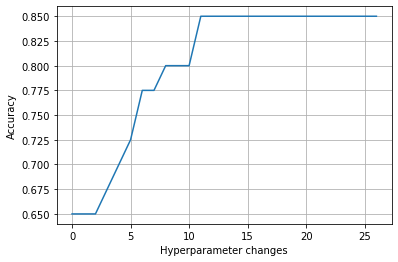

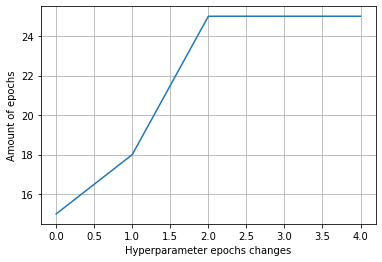

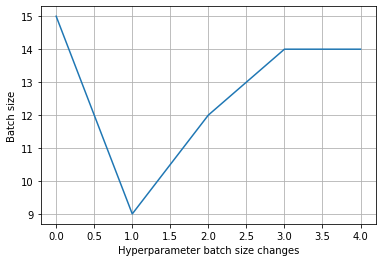

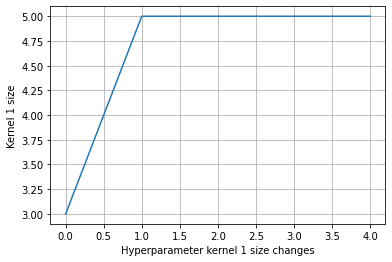

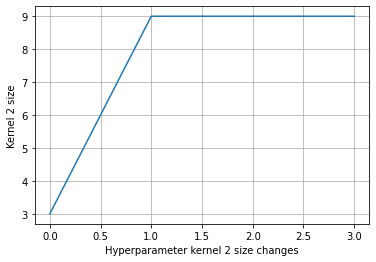

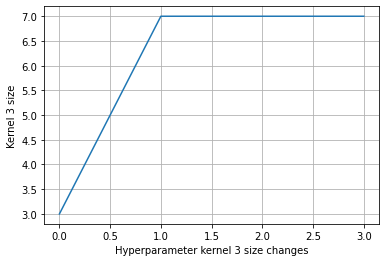

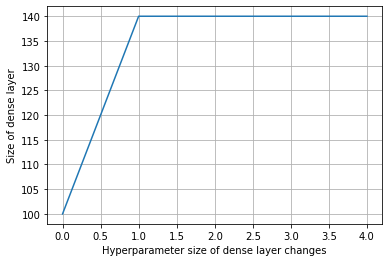

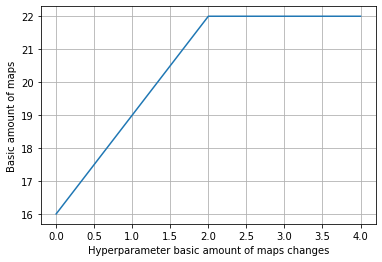

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
res_1 = hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l) # Set initial value of each hyperparameter

## e-greedy

In [11]:
def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])
    steps_dscrt = np.array([3, 5, 7, 9], int)
    dt_tp = np.array(['int', 'int', 'int', 'int'])
    acc = 0
    cnt = 0
    acc_hst = []
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps)
    tf.random.set_seed(7)
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10):
        for i in range(len(h_p)):
            if i <= 3:
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else:
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.random.rand() > 0.95:
                chc = np.random.choice(len(h_p_fld))
                
                if new_acc[chc] > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                h_p[i] = h_p_fld[chc]
                acc_hst.append(new_acc[chc])
                acc = new_acc[chc]
            
            else:
                if np.max(new_acc) > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                if h_p_fld[np.argmax(new_acc)] == rsrv:
                    res_acc = np.copy(new_acc)
                    res_acc[np.argmax(new_acc)] = 0
                    
                    if np.max(res_acc) == np.max(new_acc):
                        h_p[i] = h_p_fld[np.argmax(res_acc)]
                        acc_hst.append(np.max(res_acc))
                        acc = np.max(res_acc)
                    
                    else:
                        h_p[i] = h_p_fld[np.argmax(new_acc)]
                        acc_hst.append(np.max(new_acc))
                        acc = np.max(new_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0:
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p):
                break
        
        if cnt > 2 * len(h_p):
            break
    
    acc_hst = np.array(acc_hst)
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()
    
    return np.array([acc_hst, epchs_hst, btch_sz_hst, krnl1_hst, krnl2_hst, krnl3_hst, dns_lr_hst, maps_hst, h_p])

0.65
[ 15  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.57499999 0.57499999 0.64999998 0.64999998 0.64999998]
[ 18  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.64999998 0.64999998 0.625      0.625     ]
[ 18  18 100  16   3   3   3]
[100 140  80 120  60]
[0.625      0.64999998 0.625      0.67500001 0.64999998]
[ 18  18 120  16   3   3   3]
[ 9 12 16 19 22]
[0.55000001 0.57499999 0.67500001 0.69999999 0.64999998]
[ 18  18 120  19   3   3   3]
[3 5 7 9]
[0.69999999 0.67500001 0.67500001 0.625     ]
[ 18  18 120  19   3   3   3]
[3 5 7 9]
[0.69999999 0.67500001 0.72500002 0.72500002]
[ 18  18 120  19   3   7   3]
[3 5 7 9]
[0.72500002 0.77499998 0.75       0.77499998]
[ 18  18 120  19   3   7   5]
[10 14 18 21 25]
[0.69999999 0.75       0.77499998 0.72500002 0.72500002]
[ 18  18 120  19   3   7   5]
[10 14 18 21 25]
[0.75       0.77499998 0.77499998 0.75       0.75      ]
[ 18  14 120  19   3   7   5]
[ 96  72 168 144 120]
[0.75       0.75       0.72500002 0.77499998 0.77499998]

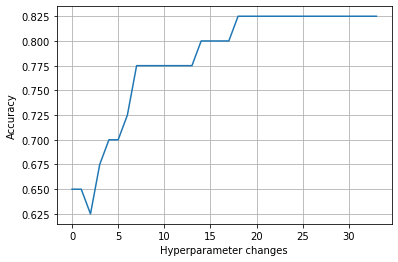

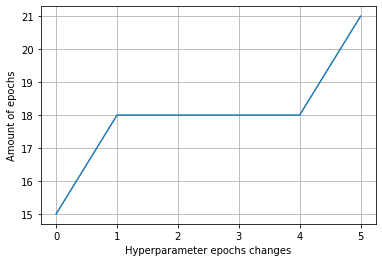

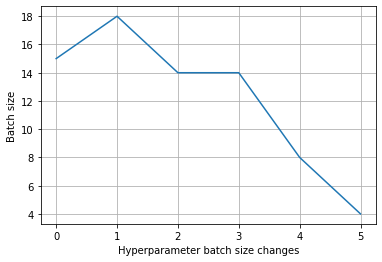

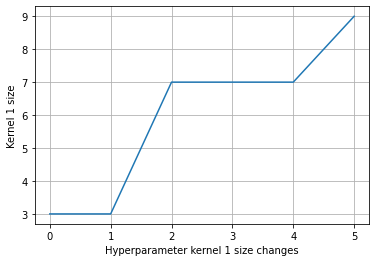

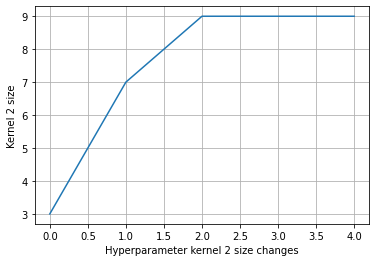

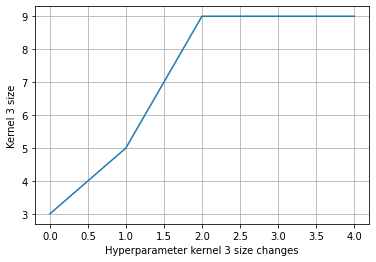

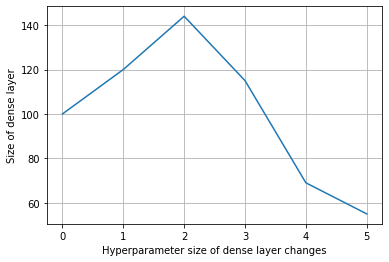

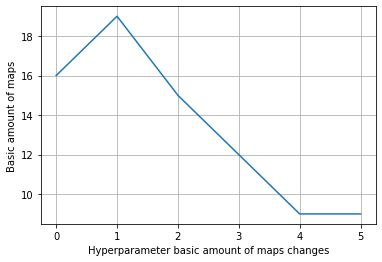

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:184: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [12]:
res_2 = hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l)

## Decaying e-greedy

In [13]:
def hyp_prm_fit(epochs, btch_sz, krnl1, krnl2, krnl3, dns_lr, maps, trn_d, trn_l, tst_d, tst_l):
    h_p = np.array([epochs, btch_sz, dns_lr, maps, krnl1, krnl2, krnl3])
    steps_cntns = np.array([0.6, 0.8, 1, 1.2, 1.4])
    steps_dscrt = np.array([3, 5, 7, 9], int)
    dt_tp = np.array(['int', 'int', 'int', 'int'])
    acc = 0
    cnt = 0
    acc_hst = []
    epchs_hst = []
    btch_sz_hst = []
    krnl1_hst = []
    krnl2_hst = []
    krnl3_hst = []
    dns_lr_hst = []
    maps_hst = []
    
    mdl = build_model((krnl1, krnl1), (krnl2, krnl2), (krnl3, krnl3), dns_lr, maps)
    tf.random.set_seed(7)
    mdl.fit(trn_d, trn_l, epochs = epochs, batch_size = btch_sz, validation_data = (tst_d, tst_l), verbose = False)
    acc = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
    acc_hst.append(acc)
    epchs_hst.append(epochs)
    btch_sz_hst.append(btch_sz)
    krnl1_hst.append(krnl1)
    krnl2_hst.append(krnl2)
    krnl3_hst.append(krnl3)
    dns_lr_hst.append(dns_lr)
    maps_hst.append(maps)
    print(acc)
    
    for episode in range(10):
        for i in range(len(h_p)):
            if i <= 3:
                h_p_fld = np.zeros(len(steps_cntns))
                h_p_fld = np.array(list(set(np.array(h_p[i] * steps_cntns, dt_tp[i]))))
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            else:
                h_p_fld = np.zeros(len(steps_dscrt))
                h_p_fld = np.array(steps_dscrt)
                new_acc = np.zeros(len(h_p_fld))
                rsrv = h_p[i]
                print(h_p)
                print(h_p_fld)
            
            for val in range(len(h_p_fld)):
                h_p[i] = h_p_fld[val]
                
                mdl = build_model((h_p[4], h_p[4]), (h_p[5], h_p[5]), (h_p[6], h_p[6]), h_p[2], h_p[3])
                tf.random.set_seed(7)
                mdl.fit(trn_d, trn_l, epochs = h_p[0], batch_size = h_p[1], validation_data = (tst_d, tst_l), verbose = False)
                new_acc[val] = mdl.evaluate(tst_d, tst_l, verbose = False)[1]
            
            
            if np.random.rand() > (1 - 0.2 / (episode + 1)):
                chc = np.random.choice(len(h_p_fld))
                
                if new_acc[chc] > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                h_p[i] = h_p_fld[chc]
                acc_hst.append(new_acc[chc])
                acc = new_acc[chc]
            
            else:
                if np.max(new_acc) > acc:
                    cnt = 0
                
                else:
                    cnt += 1
                
                if h_p_fld[np.argmax(new_acc)] == rsrv:
                    res_acc = np.copy(new_acc)
                    res_acc[np.argmax(new_acc)] = 0
                    
                    if np.max(res_acc) == np.max(new_acc):
                        h_p[i] = h_p_fld[np.argmax(res_acc)]
                        acc_hst.append(np.max(res_acc))
                        acc = np.max(res_acc)
                    
                    else:
                        h_p[i] = h_p_fld[np.argmax(new_acc)]
                        acc_hst.append(np.max(new_acc))
                        acc = np.max(new_acc)
                
                else:
                    h_p[i] = h_p_fld[np.argmax(new_acc)]
                    acc_hst.append(np.max(new_acc))
                    acc = np.max(new_acc)
            
            print(new_acc)
            
            if i == 0:
                epchs_hst.append(h_p[i])
            
            if i == 1:
                btch_sz_hst.append(h_p[i])
            
            if i == 2:
                dns_lr_hst.append(h_p[i])
            
            if i == 3:
                maps_hst.append(h_p[i])
            
            if i == 4:
                krnl1_hst.append(h_p[i])
            
            if i == 5:
                krnl2_hst.append(h_p[i])
            
            if i == 6:
                krnl3_hst.append(h_p[i])
            
            if cnt > 2 * len(h_p):
                break
        
        if cnt > 2 * len(h_p):
            break
    
    acc_hst = np.array(acc_hst)
    epchs_hst = np.array(epchs_hst)
    btch_sz_hst = np.array(btch_sz_hst)
    krnl1_hst = np.array(krnl1_hst)
    krnl2_hst = np.array(krnl2_hst)
    krnl3_hst = np.array(krnl3_hst)
    dns_lr_hst = np.array(dns_lr_hst)
    maps_hst = np.array(maps_hst)
    print(h_p)
    
    plt.plot(range(len(acc_hst)), acc_hst)
    plt.grid()
    plt.xlabel('Hyperparameter changes')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.plot(range(len(epchs_hst)), epchs_hst)
    plt.grid()
    plt.xlabel('Hyperparameter epochs changes')
    plt.ylabel('Amount of epochs')
    plt.show()
    
    plt.plot(range(len(btch_sz_hst)), btch_sz_hst)
    plt.grid()
    plt.xlabel('Hyperparameter batch size changes')
    plt.ylabel('Batch size')
    plt.show()
    
    plt.plot(range(len(krnl1_hst)), krnl1_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 1 size changes')
    plt.ylabel('Kernel 1 size')
    plt.show()
    
    plt.plot(range(len(krnl2_hst)), krnl2_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 2 size changes')
    plt.ylabel('Kernel 2 size')
    plt.show()
    
    plt.plot(range(len(krnl3_hst)), krnl3_hst)
    plt.grid()
    plt.xlabel('Hyperparameter kernel 3 size changes')
    plt.ylabel('Kernel 3 size')
    plt.show()
    
    plt.plot(range(len(dns_lr_hst)), dns_lr_hst)
    plt.grid()
    plt.xlabel('Hyperparameter size of dense layer changes')
    plt.ylabel('Size of dense layer')
    plt.show()
    
    plt.plot(range(len(maps_hst)), maps_hst)
    plt.grid()
    plt.xlabel('Hyperparameter basic amount of maps changes')
    plt.ylabel('Basic amount of maps')
    plt.show()
    
    return np.array([acc_hst, epchs_hst, btch_sz_hst, krnl1_hst, krnl2_hst, krnl3_hst, dns_lr_hst, maps_hst, h_p])

0.65
[ 15  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.57499999 0.57499999 0.64999998 0.64999998 0.64999998]
[ 18  15 100  16   3   3   3]
[ 9 12 15 18 21]
[0.64999998 0.64999998 0.64999998 0.625      0.625     ]
[ 18   9 100  16   3   3   3]
[100 140  80 120  60]
[0.64999998 0.67500001 0.67500001 0.67500001 0.67500001]
[ 18   9 140  16   3   3   3]
[ 9 12 16 19 22]
[0.60000002 0.60000002 0.67500001 0.69999999 0.67500001]
[ 18   9 140  19   3   3   3]
[3 5 7 9]
[0.69999999 0.72500002 0.72500002 0.64999998]
[ 18   9 140  19   3   3   3]
[3 5 7 9]
[0.69999999 0.75       0.72500002 0.72500002]
[ 18   9 140  19   3   5   3]
[3 5 7 9]
[0.75       0.75       0.69999999 0.75      ]
[ 18   9 140  19   3   5   5]
[10 14 18 21 25]
[0.72500002 0.75       0.75       0.67500001 0.69999999]
[ 14   9 140  19   3   5   5]
[ 5  7  9 10 12]
[0.72500002 0.75       0.75       0.75       0.69999999]
[ 14   7 140  19   3   5   5]
[196 168 140 112  84]
[0.77499998 0.77499998 0.75       0.77499998 0.72500002]

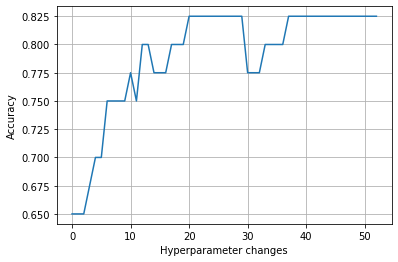

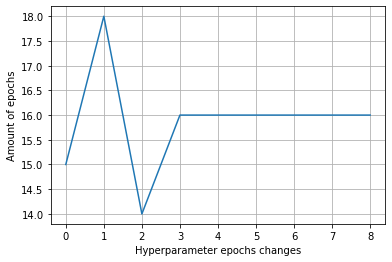

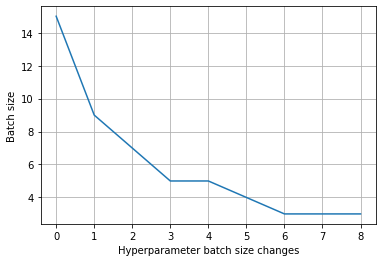

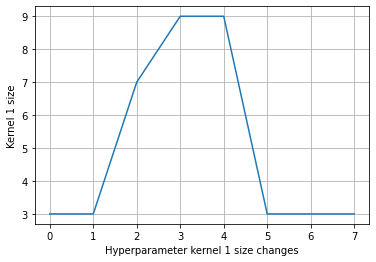

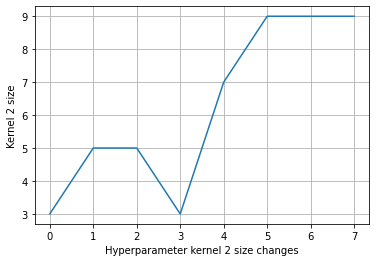

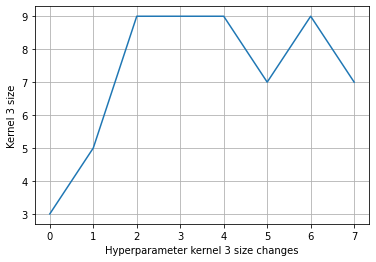

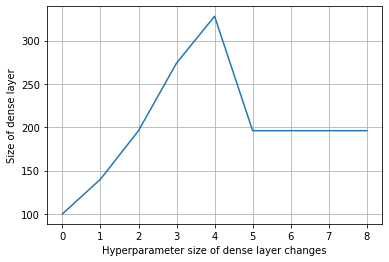

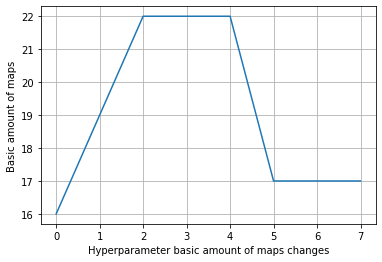

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:184: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [14]:
res_3 = hyp_prm_fit(15, 15, 3, 3, 3, 100, 16, trn_d, trn_l, tst_d, tst_l)

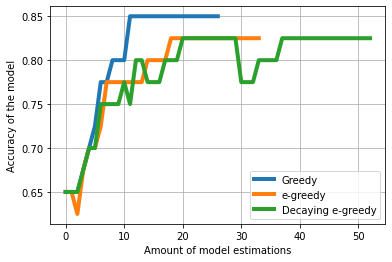

In [29]:
plt.plot(range(len(res_1[0])), res_1[0], linewidth = 4)
plt.plot(range(len(res_2[0])), res_2[0], linewidth = 4)
plt.plot(range(len(res_3[0])), res_3[0], linewidth = 4)
plt.grid()
plt.xlabel('Amount of model estimations')
plt.ylabel('Accuracy of the model')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

In [50]:
print('Greedy: amount of epochs - ' + str(res_1[8][0]) + ', batch size - ' + str(res_1[8][1]) + ', dense layer size - ' + \
    str(res_1[8][2]) + ', amount of maps - ' + str(res_1[8][3]) + ', kernel 1 size - ' + str(res_1[8][4]) + \
    ', kernel 2 size - ' + str(res_1[8][5]) + ', kernel 3 size - ' + str(res_1[8][6]) + '\n')
print('e-greedy: amount of epochs - ' + str(res_2[8][0]) + ', batch size - ' + str(res_2[8][1]) + ', dense layer size - ' + \
    str(res_2[8][2]) + ', amount of maps - ' + str(res_2[8][3]) + ', kernel 1 size - ' + str(res_2[8][4]) + \
    ', kernel 2 size - ' + str(res_2[8][5]) + ', kernel 3 size - ' + str(res_2[8][6]) + '\n')
print('Decaying e-greedy: amount of epochs - ' + str(res_3[8][0]) + ', batch size - ' + str(res_3[8][1]) + \
    ', dense layer size - ' + str(res_3[8][2]) + ', amount of maps - ' + str(res_3[8][3]) + ', kernel 1 size - ' + \
    str(res_3[8][4]) + ', kernel 2 size - ' + str(res_3[8][5]) + ', kernel 3 size - ' + str(res_3[8][6]))

Greedy: amount of epochs - 25, batch size - 14, dense layer size - 140, amount of maps - 22, kernel 1 size - 5, kernel 2 size - 9, kernel 3 size - 7

e-greedy: amount of epochs - 21, batch size - 4, dense layer size - 55, amount of maps - 9, kernel 1 size - 9, kernel 2 size - 9, kernel 3 size - 9

Decaying e-greedy: amount of epochs - 16, batch size - 3, dense layer size - 196, amount of maps - 17, kernel 1 size - 3, kernel 2 size - 9, kernel 3 size - 7


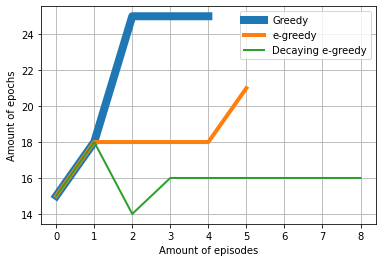

In [52]:
plt.plot(range(len(res_1[1])), res_1[1], linewidth = 8)
plt.plot(range(len(res_2[1])), res_2[1], linewidth = 4)
plt.plot(range(len(res_3[1])), res_3[1], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Amount of epochs')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

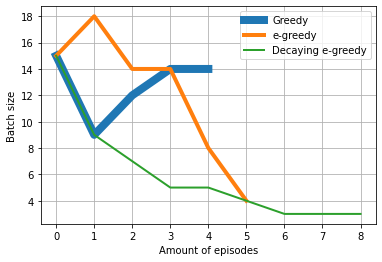

In [53]:
plt.plot(range(len(res_1[2])), res_1[2], linewidth = 8)
plt.plot(range(len(res_2[2])), res_2[2], linewidth = 4)
plt.plot(range(len(res_3[2])), res_3[2], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Batch size')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

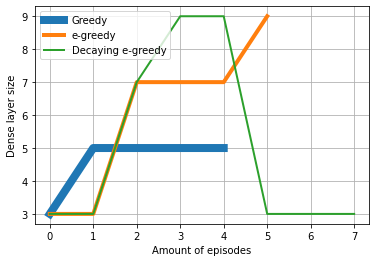

In [54]:
plt.plot(range(len(res_1[3])), res_1[3], linewidth = 8)
plt.plot(range(len(res_2[3])), res_2[3], linewidth = 4)
plt.plot(range(len(res_3[3])), res_3[3], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Dense layer size')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

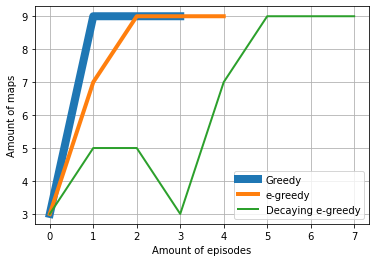

In [55]:
plt.plot(range(len(res_1[4])), res_1[4], linewidth = 8)
plt.plot(range(len(res_2[4])), res_2[4], linewidth = 4)
plt.plot(range(len(res_3[4])), res_3[4], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Amount of maps')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

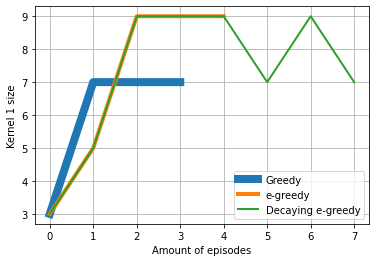

In [56]:
plt.plot(range(len(res_1[5])), res_1[5], linewidth = 8)
plt.plot(range(len(res_2[5])), res_2[5], linewidth = 4)
plt.plot(range(len(res_3[5])), res_3[5], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Kernel 1 size')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

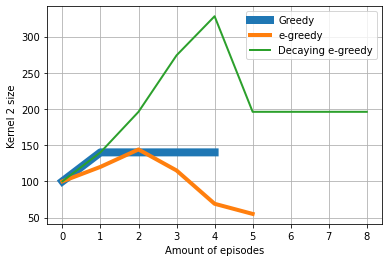

In [57]:
plt.plot(range(len(res_1[6])), res_1[6], linewidth = 8)
plt.plot(range(len(res_2[6])), res_2[6], linewidth = 4)
plt.plot(range(len(res_3[6])), res_3[6], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Kernel 2 size')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()

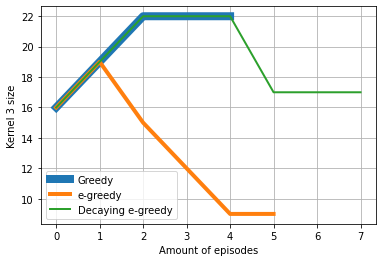

In [58]:
plt.plot(range(len(res_1[7])), res_1[7], linewidth = 8)
plt.plot(range(len(res_2[7])), res_2[7], linewidth = 4)
plt.plot(range(len(res_3[7])), res_3[7], linewidth = 2)
plt.grid()
plt.xlabel('Amount of episodes')
plt.ylabel('Kernel 3 size')
plt.legend(['Greedy', 'e-greedy', 'Decaying e-greedy'])
plt.show()